<a href="https://colab.research.google.com/github/Yaoc0009/EE4483-Assignment/blob/main/House_Price_Model_w_MAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


(a) Understand the training and testing datasets that we provided: Make a table to describe the two datasets, including their feature dimension, number of samples, mean and variance of the values in each attribute. (5% marks)

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("train.csv", usecols=["BldgType", "OverallQual","GrLivArea","GarageArea","SalePrice"])
test = pd.read_csv("test.csv", usecols=["BldgType", "OverallQual","GrLivArea","GarageArea"])

(b) Select at least one appropriate model (e.g., linear regressor, neural network, support vector machine, etc.) to build your regressor. Clearly describe the model you use, including the input and output dimensions, structure of the model, loss function(s), training strategy, etc. Include your code if you are solving the problem by programming. (15% marks)

In [ ]:
#Create categorical features
cat_feature = ["BldgType"]
out_feature = "SalePrice"

In [ ]:
train["BldgType"].unique()

array(['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["BldgType"]=LabelEncoder()
train["BldgType"]=lbl_encoders["BldgType"].fit_transform(train["BldgType"])

In [ ]:
train

,BldgType,OverallQual,GrLivArea,GarageArea,SalePrice
0,0,7,1710,548,208500
1,0,6,1262,460,181500
2,0,7,1786,608,223500
3,0,7,1717,642,140000
4,0,8,2198,836,250000
...,...,...,...,...,...
995,0,4,1230,305,121600
996,0,5,1050,368,136500
997,0,6,1442,615,185000
998,0,3,1077,210,91000


In [ ]:
import numpy as np
cat_feature=np.stack([train['BldgType']],1)
cat_feature

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [4],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [4],
       [0],
       [0],
       [2],
       [0],
       [0],
       [3],
       [0],
    

In [ ]:
### Convert numpy to Tensors
import torch
cat_feature=torch.tensor(cat_feature,dtype=torch.int64)
cat_feature

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [2],
        [0],
        [0],
        [0],
        [0],
        [0],
        [3],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [3],
        [0],
        [0],
        [0],
        [0],
        [2],
        [0],
        [0],
        [0],
        [0],
        [0],
        [3],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [2],
        [0],
        [0],
        [0],
        [4],
        [0],
        [0],
        [0],
        [0],
        [0],
        [3],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [4],
        [0],

In [ ]:
#### create continuous variable
cont_features=[]
for i in train.columns:
    if i in ["BldgType","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [ ]:
cont_features

['OverallQual', 'GrLivArea', 'GarageArea']

In [ ]:
### Stacking continuous variable to a tensor
cont_values=np.stack([train[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   7., 1710.,  548.],
        [   6., 1262.,  460.],
        [   7., 1786.,  608.],
        ...,
        [   6., 1442.,  615.],
        [   3., 1077.,  210.],
        [   7., 1208.,  632.]])

In [ ]:
### Dependent Feature 
y=torch.tensor(train['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        [140000.],
        [250000.],
        [143000.],
        [307000.],
        [200000.],
        [129900.],
        [118000.],
        [129500.],
        [345000.],
        [144000.],
        [279500.],
        [157000.],
        [132000.],
        [149000.],
        [ 90000.],
        [159000.],
        [139000.],
        [325300.],
        [139400.],
        [230000.],
        [129900.],
        [154000.],
        [256300.],
        [134800.],
        [306000.],
        [207500.],
        [ 68500.],
        [ 40000.],
        [149350.],
        [179900.],
        [165500.],
        [277500.],
        [309000.],
        [145000.],
        [153000.],
        [109000.],
        [ 82000.],
        [160000.],
        [170000.],
        [144000.],
        [130250.],
        [141000.],
        [319900.],
        [239686.],
        [249700.],
        [113000.],
        [127000.],
        [177000.],
        [114500.],
        [110

In [ ]:
#### Embedding Size For Categorical columns
cat_dims=[len(train[col].unique()) for col in ["BldgType"]]

In [ ]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(5, 3)
)

In [ ]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_feature[:,i]))

In [ ]:
embedding_val


[tensor([[-0.3603,  0.1618,  0.3823],
         [-0.3603,  0.1618,  0.3823],
         [-0.3603,  0.1618,  0.3823],
         ...,
         [-0.3603,  0.1618,  0.3823],
         [-0.3603,  0.1618,  0.3823],
         [-0.3603,  0.1618,  0.3823]], grad_fn=<EmbeddingBackward>)]

In [ ]:
z = torch.cat(embedding_val, 1)
z

tensor([[-0.3603,  0.1618,  0.3823],
        [-0.3603,  0.1618,  0.3823],
        [-0.3603,  0.1618,  0.3823],
        ...,
        [-0.3603,  0.1618,  0.3823],
        [-0.3603,  0.1618,  0.3823],
        [-0.3603,  0.1618,  0.3823]], grad_fn=<CatBackward>)

In [ ]:
#### Implement dropupout
droput=nn.Dropout(.4)

In [ ]:
final_embed=droput(z)
final_embed

tensor([[-0.6005,  0.0000,  0.6372],
        [-0.0000,  0.2697,  0.0000],
        [-0.6005,  0.0000,  0.6372],
        ...,
        [-0.0000,  0.2697,  0.0000],
        [-0.6005,  0.2697,  0.6372],
        [-0.6005,  0.2697,  0.0000]], grad_fn=<MulBackward0>)

In [ ]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [ ]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [ ]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(5, 3)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=6, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [ ]:
loss_function=nn.L1Loss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
batch_size=1000
test_size=int(batch_size*0.15)
train_categorical=cat_feature[:batch_size-test_size]
test_categorical=cat_feature[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [ ]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)


(850, 150, 850, 150, 850, 150)

In [ ]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=loss_function(y_pred,y_train) ### MAE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 183514.453125
Epoch number: 11 and the loss : 183513.734375
Epoch number: 21 and the loss : 183511.921875
Epoch number: 31 and the loss : 183508.421875
Epoch number: 41 and the loss : 183503.078125
Epoch number: 51 and the loss : 183495.703125
Epoch number: 61 and the loss : 183485.96875
Epoch number: 71 and the loss : 183472.703125
Epoch number: 81 and the loss : 183457.78125
Epoch number: 91 and the loss : 183439.84375
Epoch number: 101 and the loss : 183418.609375
Epoch number: 111 and the loss : 183395.203125
Epoch number: 121 and the loss : 183368.0
Epoch number: 131 and the loss : 183338.109375
Epoch number: 141 and the loss : 183305.96875
Epoch number: 151 and the loss : 183272.109375
Epoch number: 161 and the loss : 183233.875
Epoch number: 171 and the loss : 183192.28125
Epoch number: 181 and the loss : 183149.1875
Epoch number: 191 and the loss : 183102.53125
Epoch number: 201 and the loss : 183054.53125
Epoch number: 211 and the loss : 182998.8

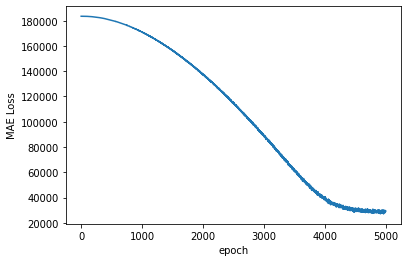

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('MAE Loss')
plt.xlabel('epoch');

In [ ]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=loss_function(y_pred,y_test)
print('MAE: {}'.format(loss))

MAE: 28345.916015625


In [ ]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [ ]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [ ]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output

,Test,Prediction,Difference
0,131500.0,144550.921875,-13050.921875
1,215000.0,229999.687500,-14999.687500
2,164000.0,193623.218750,-29623.218750
3,158000.0,199341.312500,-41341.312500
4,170000.0,159906.593750,10093.406250
5,127000.0,113138.023438,13861.976562
6,147000.0,154245.796875,-7245.796875
7,174000.0,175194.156250,-1194.156250
8,152000.0,182913.734375,-30913.734375
9,250000.0,223480.187500,26519.812500


Predicting results for test.csv

In [ ]:
#Create categorical features
cat_feature0 = ["BldgType"]
out_feature0 = "SalePrice"

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["BldgType"]=LabelEncoder()
test["BldgType"]=lbl_encoders["BldgType"].fit_transform(test["BldgType"])

In [ ]:
import numpy as np
cat_feature0=np.stack([test['BldgType']],1)
cat_feature0

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [3],
       [0],
       [0],
    

In [ ]:
### Convert numpy to Tensors
import torch
cat_feature0=torch.tensor(cat_feature0,dtype=torch.int64)
cat_feature0

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [3],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [3],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [3],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [3],
        [0],
        [0],
        [0],

In [ ]:
#### create continuous variable
cont_features0=[]
for i in test.columns:
    if i in ["BldgType","SalePrice"]:
        pass
    else:
        cont_features0.append(i)

In [ ]:
### Stacking continuous variable to a tensor
cont_values0=np.stack([test[i].values for i in cont_features0],axis=1)
cont_values0=torch.tensor(cont_values0,dtype=torch.float)

In [ ]:
#### Predict test.csv data
test_pred=""
with torch.no_grad():
    test_pred=model(cat_feature0,cont_values0)


In [ ]:
test_results = pd.DataFrame(test_pred.tolist(),columns = ["Prediction"])
test_results

,Prediction
0,325867.500000
1,349672.093750
2,371951.406250
3,402780.125000
4,468332.093750
5,400923.125000
6,465258.375000
7,327349.812500
8,373959.187500
9,193140.531250


In [ ]:
train_vis = pd.read_csv("train.csv", usecols=["BldgType", "OverallQual","GrLivArea","GarageArea","SalePrice"])
test_vis = pd.read_csv("test.csv", usecols=["BldgType", "OverallQual","GrLivArea","GarageArea"])

In [ ]:
test_vis["SalePrice"] = test_results
train_vis["Category"] = "Train"
test_vis["Category"] = "Test"

combined_vis = train_vis.append(test_vis)

In [ ]:
test["SalePrice"] = test_results
train["Category"] = "Train"
test["Category"] = "Test"

combined = train.append(test)

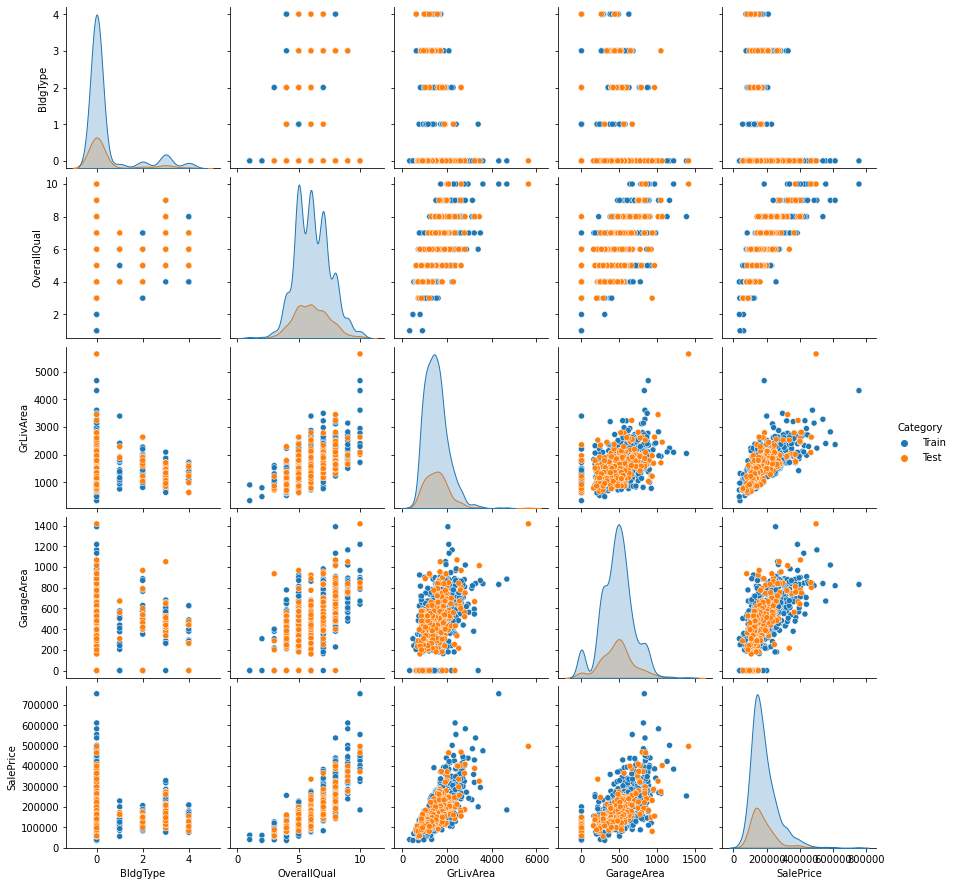

In [ ]:
### Visualise data to compare
import seaborn as sns

sns.pairplot(combined, hue = "Category")

In [ ]:
print(train_vis.corr('pearson'))

             OverallQual  GrLivArea  GarageArea  SalePrice
OverallQual     1.000000   0.610512    0.592268   0.797666
GrLivArea       0.610512   1.000000    0.485337   0.734997
GarageArea      0.592268   0.485337    1.000000   0.647953
SalePrice       0.797666   0.734997    0.647953   1.000000
